In [1]:
using PyPlot, PyCall
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/defaults.jl");

In [4]:
model = ClimateModel();

### Baseline emissions scenario

In [3]:
ppm_to_GtCO2(q0)

58.574999999999996

In [4]:
maximum(CO₂_baseline(model))

1350.625

In [5]:
r*q0

3.75

In [6]:
maximum(FCO₂_baseline(model)/sec_per_year) + 3.0

8.361028832768607

### Carbon dioxide removal costs

\begin{equation}
C_{R} (1/2)^{2} = 110\; \$ q_{0}
\end{equation}

In [7]:
baseline_carbon_ppm = maximum(CO₂(model)) - 280.

1070.625

In [8]:
baseline_carbon_GtCO2 = ppm_to_GtCO2(baseline_carbon_ppm)

8361.58125

In [9]:
CDR_years = baseline_carbon_GtCO2/ppm_to_GtCO2(q0)

142.75

In [92]:
annualized_cost = round(110. * (ppm_to_GtCO2(q0) * 1.e9) * 1.e-12, digits=1)

6.4

In [87]:
round(CDR_potential, digits=2)

0.42

In [89]:
sum(values(potentials))

24.6

In [91]:
mean_cost

111.34146341463413

### Adaptation cost

From the Global Comission on Adaptation, we assume 1.8 trillion USD could be spent between 2020 and 2030. Since it is unclear what fraction of climate damages this might offset, we generously assume it offsets about one sixth.

\begin{equation}
C_{A} (1/4)^{2} = \frac{1.8 \text{ trillion USD}}{10\text{ years}}
\end{equation}

In [25]:
(1. /5.)^(-2) * 0.018/10. 

0.04499999999999999

In [2]:
model = ClimateModel();

In [137]:
Benefits = 8.9
A = Benefits/(sum( (β * GWP(t) .* δT(model).^2) .* (1. + utility_discount_rate).^(2020. .- t) * dt) )

1.3754547728488377e-15

In [24]:
sum( (β * GWP(t) .* 1.5 .^2) .* (1. + utility_discount_rate).^(2020. .- t) * dt)

256.8763854851097

In [121]:
β*GWP0*δT_init^2 * 10

2.688888888888889

In [105]:
β*δT_init^2

0.002688888888888889

This is about half or one third of the other estimates I have been using for adaptation.

### Mitigation cost

In [76]:
E = GWP(t);

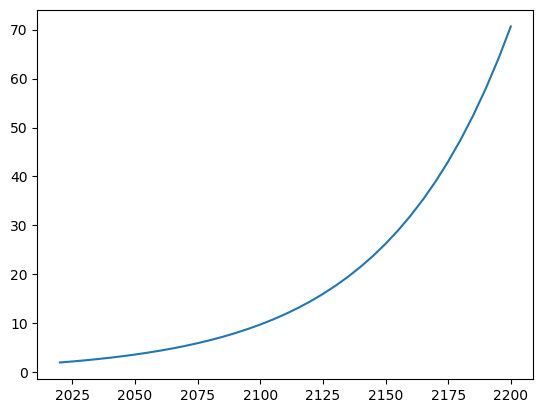

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15094c5f8>

In [77]:
plot(t, mitigate_cost * E/GWP0)

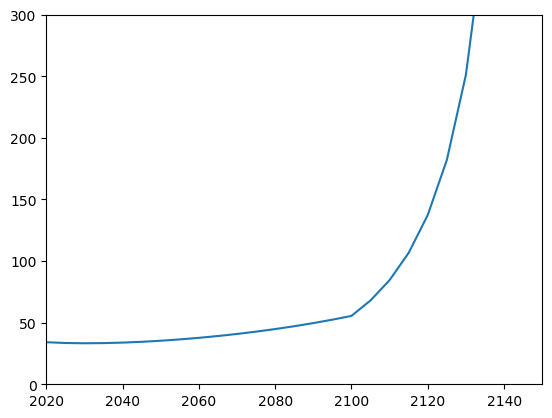

(0, 300)

In [79]:
plot(t, (mitigate_cost .* E/GWP0) .* 1e12 ./ ppm_to_tCO2(model.economics.baseline_emissions))
xlim([2020, 2150])
ylim([0, 300])

In [72]:
0.5^2 * mitigate_cost * 1e12 / ppm_to_tCO2(q0)

8.536064874093045

In [73]:
344. * 0.5^2.8

49.39402926487251

### Physical model values

In [13]:
τd

239.01078918656805

In [7]:
τu = Cu/(B+κ)

3.924731182795699

In [15]:
FCO₂_2x/(B+κ)*sec_per_year

1.8561091471498012

In [16]:
FCO₂_2x/(B)*sec_per_year

3.0551885076979026

In [17]:
κ/(B+κ)

0.3924731182795699

In [18]:
B/(B+κ)

0.6075268817204301

### Audit of DICE parameters

In [26]:
B = 3.8/2.9

1.3103448275862069

In [27]:
κ = 0.088

0.088

In [28]:
Cu = 5. /0.098

51.0204081632653

In [29]:
Cd = (0.088/0.025)*5

17.599999999999998

In [30]:
τu = Cu/(B+κ)

36.48628518284409